<a href="https://colab.research.google.com/github/frank-lacriola/Data-Science-Lab/blob/main/Lab10_Clustering_over_Chameleon_and_20_Newsgroups.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2D_gauss_clusters.txt

--2021-12-27 22:13:39--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/2D_gauss_clusters.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70004 (68K) [text/plain]
Saving to: ‘2D_gauss_clusters.txt’

2D_gauss_clusters.t 100%[===================>]  68.36K  --.-KB/s    in 0.006s  

2021-12-27 22:13:39 (11.0 MB/s) - ‘2D_gauss_clusters.txt’ saved [70004/70004]



In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("/content/2D_gauss_clusters.csv")

In [10]:
df.head()

,x,y
0,845753,636607
1,812954,643720
2,868217,609046
3,920248,607272
4,841621,639394


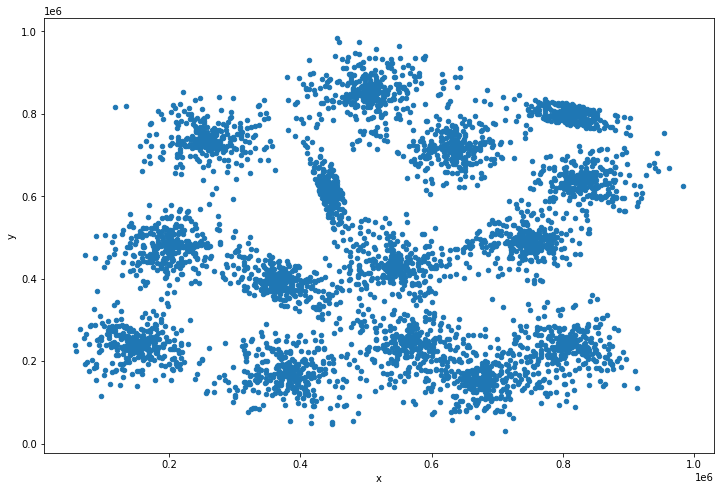

In [11]:
ax = df.plot.scatter(x='x', y='y', figsize=(12,8))

Let's normalize data (min-max):

In [12]:
df_min_max_scaled = df.copy()
for column in df.columns:
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    


In [37]:
class KMeans:
  def __init__(self, n_clusters, max_iter=100, distance_metric='euclidean'):
    self.n_clusters = n_clusters
    self.max_iter = max_iter
    self.centroids = None
    self.labels = None
    self.distance_metric = distance_metric


  def fit_predict(self, X):
    """Run the K-means clustering on X.
    :param X: input data points, array, shape = (N,C).
    :return: labels : array, shape = N.
    """
    self.centroids = np.random.rand(self.n_clusters, 2)
    for _ in range(self.max_iter):
      labels = []
      for i in range(X.shape[0]):
        labels.append(self.assign_label(X[i]))

      # Let's update centroids
      for j in range(self.centroids.shape[0]):
        mask = []
        for k in range(len(labels)):
          if labels[k] == j:
            mask.append(k)
        self.centroids[j] = [X[mask, 0].mean(), X[mask, 1].mean()]

    self.labels = labels
    return self.labels, self.centroids


  def assign_label(self, X):
    #print(np.argmin(self.compute_distance(X)))
    return np.argmin(self.compute_distance(X))


  def compute_distance(self, X):
    distances = []
    for j in range(self.centroids.shape[0]):
      if self.distance_metric=='euclidean':
        # calculating Euclidean distance
        # using linalg.norm()
        point1 = X
        point2 = self.centroids[j]
        distances.append(np.linalg.norm(point1 - point2))
             
    return np.array(distances)
      

km = KMeans(n_clusters=15, max_iter=100)

In [38]:
labels, centroids = km.fit_predict(X=df_min_max_scaled.to_numpy())

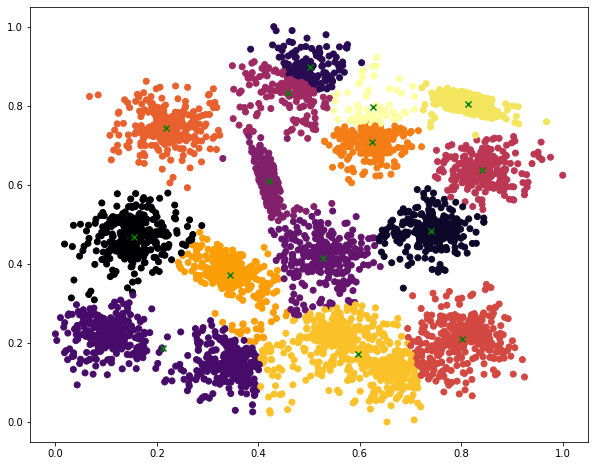

In [45]:
fig, ax = plt.subplots(1, figsize=(10, 8))
plt.scatter(x=df_min_max_scaled['x'], y=df_min_max_scaled['y'], c=labels, cmap="inferno")
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='green')

Let's try kMeans over Chameleon dataset:


In [46]:
!wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/chameleon_clusters.txt

--2021-12-27 22:54:04--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/chameleon_clusters.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 172922 (169K) [text/plain]
Saving to: ‘chameleon_clusters.txt’

chameleon_clusters. 100%[===================>] 168.87K  --.-KB/s    in 0.02s   

2021-12-27 22:54:04 (10.2 MB/s) - ‘chameleon_clusters.txt’ saved [172922/172922]



In [47]:
df = pd.read_csv("/content/chameleon_clusters.csv")

In [51]:
df_min_max_scaled = df.copy()
for column in df.columns:
  df_min_max_scaled[column] = (df_min_max_scaled[column] - df_min_max_scaled[column].min()) / (df_min_max_scaled[column].max() - df_min_max_scaled[column].min())    

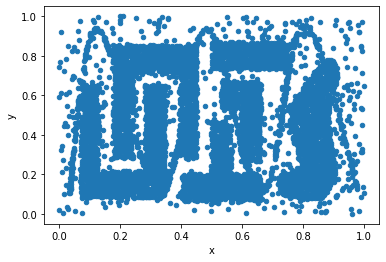

In [52]:
df_min_max_scaled.plot.scatter(x='x',y='y')

In [56]:
km = KMeans(n_clusters=6, max_iter=200)
labels, centroids = km.fit_predict(X=df_min_max_scaled.to_numpy())

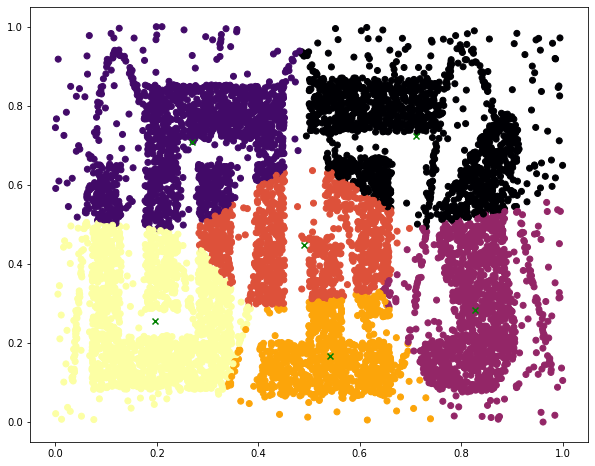

In [57]:
fig, ax = plt.subplots(1, figsize=(10, 8))
plt.scatter(x=df_min_max_scaled['x'], y=df_min_max_scaled['y'], c=labels, cmap="inferno")
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', c='green')